In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle


import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

Using TensorFlow backend.


In [2]:
item = 'Nature_rune'

In [3]:
items.getPrices(item)[-10:]

[264, 263, 258, 257, 256.0, 255, 249, 244, 241, 237.5]

In [4]:
items.getInfo(item)

{'members': 'False',
 'edible': 'False',
 'update': '/w/Update:New_magic_system_online!',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Nature_rune.png',
 'lowAlch': '72',
 'examine': 'Used for alchemy spells',
 'highAlch': '108',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'False',
 'weight': '0.0',
 'released': '24 May 2001',
 'storeCurrency': 'N/A',
 'name': 'Nature_rune',
 'alchable': 'True',
 'exchangePrice': '253',
 'tradeable': 'True',
 'buyLimit': '12000',
 'noteable': 'True',
 'stackable': 'True'}

1311 1320 1311


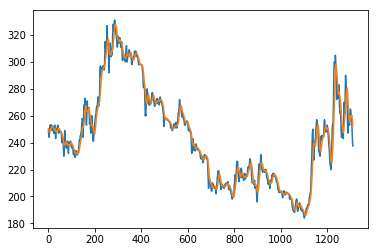

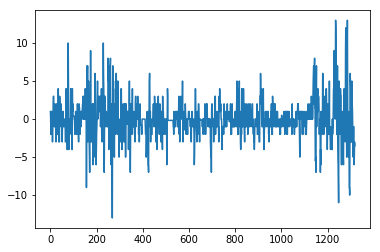

In [5]:
ma = 10
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.movingAverage(item,ma)
print(len(movAvg),len(prices),len(prices[ma-1:]))
plt.plot(prices[ma-1:])
plt.plot(movAvg)
plt.plot()
plt.show()
plt.plot(changes)
plt.show()

In [6]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

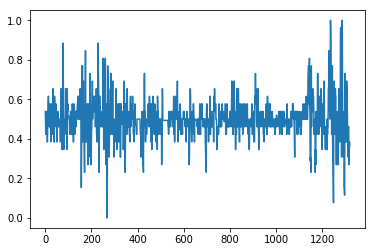

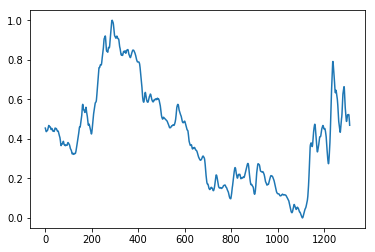

In [7]:
s_changes = minMax(changes)
s_movAvg = minMax(movAvg)
plt.plot(s_changes)
plt.show()
plt.plot(s_movAvg)
plt.show()

In [8]:
x = []
y = []
p = []
size = 10
for i in range(-1*len(s_changes),-1*size,1):
    x.append(s_movAvg[i:i+5]+s_changes[i:i+size])
    y.append(s_changes[i+size+1])
    p.append(prices[i+size+1])
print(x[-1],y[-1])
print(len(x),len(y),len(p))

[0.5175808720112516, 0.5218002812939522, 0.5225035161744024, 0.5218002812939522, 0.5218002812939522, 0.5384615384615384, 0.46153846153846156, 0.46153846153846156, 0.3076923076923077, 0.46153846153846156, 0.46153846153846156, 0.46153846153846156, 0.2692307692307692, 0.3076923076923077, 0.38461538461538464] 0.5384615384615384
1309 1309 1309


In [9]:
x = []
y = []
p = []
for i in range(-1*len(s_movAvg),-5,1):
    x.append(s_movAvg[i:i+5]+s_changes[i:i+5])
    y.append(s_changes[i+6])
    p.append(prices[i+6])
print(x[-1],y[-1])
print(len(x),len(y),len(p))

[0.5218002812939522, 0.5232067510548521, 0.5168776371308017, 0.5042194092827004, 0.4880450070323487, 0.46153846153846156, 0.46153846153846156, 0.2692307692307692, 0.3076923076923077, 0.38461538461538464] 0.5384615384615384
1306 1306 1306


In [10]:
s1 = int(len(y)*.7)
s2  =int(len(y)*.85)
x_train = np.array(x[:s1])
y_train = np.array(y[:s1])
x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])
print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(x_train[0],y_train[0],x_test[0],y_test[0])

914 914 196 196 196 196 196
[0.45428973 0.45077356 0.44514768 0.4395218  0.43670886 0.42307692
 0.38461538 0.42307692 0.5        0.57692308] 0.6153846153846154 [0.00773558 0.01265823 0.01758087 0.02250352 0.02672293 0.53846154
 0.5        0.5        0.53846154 0.5       ] 0.5769230769230769


196 196


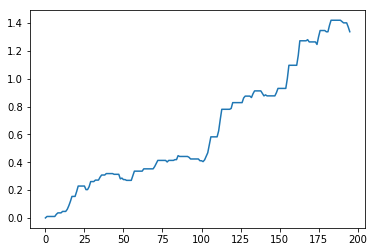

In [12]:
import util.trading_systems as ts

data = prices[-1*len(y_test):]
chan = s_changes[-1*len(y_test)-1:-1]
budget = 100 * data[-1]
bl = int(items.getInfo(item)['buyLimit'])
print(len(data),len(chan))
pp = ts.perfectProfit(chan,0,y_test,data,bl,budget)
plt.plot(pp)
plt.show()

In [11]:
model = Sequential()
model.add(Dense(10, input_dim=10))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
sgd = SGD(lr=0.05)
model.compile(loss='mse',
              optimizer=sgd,
              metrics=['mse'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=20,
            batch_size=16)
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

Train on 914 samples, validate on 196 samples
Epoch 1/30
914/914 [==============================] - 1s 1ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 2/30
914/914 [==============================] - 0s 157us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 3/30
914/914 [==============================] - 0s 168us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/30
914/914 [==============================] - 0s 240us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 5/30
914/914 [==============================] - 0s 287us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/30
914/914 [==============================] - 0s 173us/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0018 - val

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


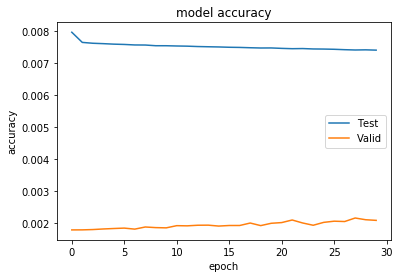

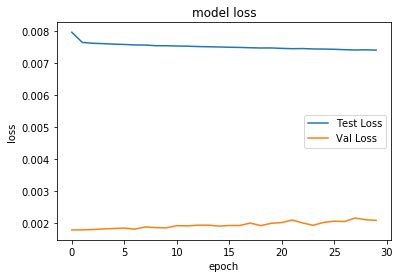

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'],label='Test')
plt.plot(history.history['val_mean_squared_error'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

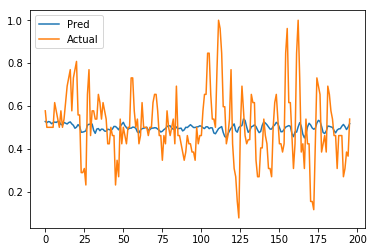

In [14]:
y_pred = model.predict(x_test)
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()

In [16]:
bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
ppBest = [([-100],-1)] * len(budgets)
bhBest = [([-100],-1)] * len(budgets)
perBest = [([-100],-1)] * len(budgets)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    for i in range(10):
        mp = ts.modelProfit(x_test,t,model,p_test,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        pp = ts.perfectProfit(x_test,t,y_test,p_test,bl,budgets[b])
        if pp[-1]>ppBest[b][0][-1]:
            ppBest[b] = (pp,t)
        per = ts.persistanceProfit(x_test,t,y_test,p_test,bl,budgets[b])
        if per[-1]>perBest[b][0][-1]:
            perBest[b] = (per,t)
        t += .02

196
100000


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [184]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tPerfect\n\t',ppBest[b][0][-1],ppBest[b][1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 0.146885 0.18
	Perfect
	 1.17309 0.02
	Buy and Hold
	 0.29355
1000000
	Model
	 0.146937 0.18
	Perfect
	 1.174284 0.02
	Buy and Hold
	 0.293778
10000000
	Model
	 0.1961788 0.06
	Perfect
	 0.4853202 0
	Buy and Hold
	 0.0684
100000000
	Model
	 0.02598 0
	Perfect
	 0.0504 0
	Buy and Hold
	 0.00684
1000000000
	Model
	 0.002598 0
	Perfect
	 0.00504 0
	Buy and Hold
	 0.000684


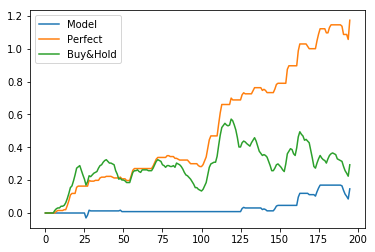

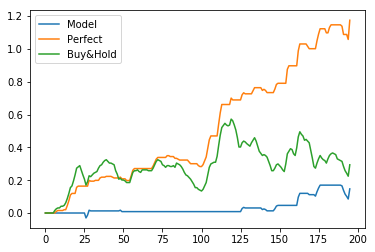

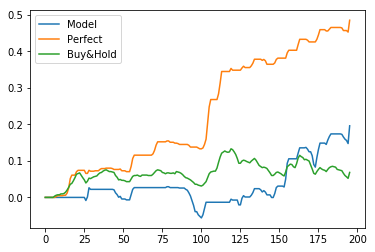

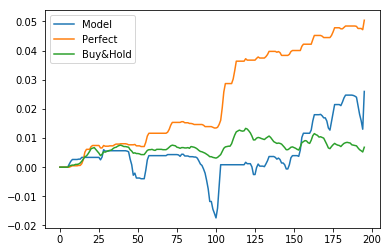

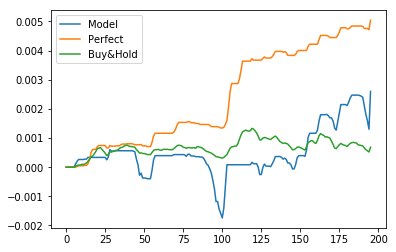

In [185]:
for b in range(len(budgets)):
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(ppBest[b][0],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()